# Examine RadarSAT2 Archive for a particular location

# (GOOD!) Now that MDA is part of Maxar, it seems new and better search finally exists!
https://gsiportal.mdacorporation.com/gc_cp/#/map 

###### (BAD) full catalog search as of 10/2018:
https://www.eodms-sgdot.nrcan-rncan.gc.ca/index_en.jsp 


###### (BAD) old catalog search allows downloading csvs:
https://neodf.nrcan.gc.ca/neodf_cat3/index.php?lang=en#



In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from pandas.plotting import table
import matplotlib.dates as mdates

In [2]:
%matplotlib inline
#%qtconsole

In [3]:
pwd

'/Users/scott/Documents/GitHub/snowex/snowex2019'

In [4]:
ls /Users/scott/Documents/Research/Stereo2SWE/RS2/

boise-rs2-search.geojson  gm-rs2-search.geojson     grandmesa-aoi.geojson
boise-rs2-search.kml      gm-rs2-search.kml
gm-aoi.kml                gm-search.table


In [34]:
vectorFile = '/Users/scott/Documents/Research/Stereo2SWE/UAVSAR/Name_BOI1EW_232aa.geojson'

# Grand mesa
Name_GM2ER1_092aa-RS2.csv

In [35]:
# Doesn't work so well.
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' 
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' 
gf = gpd.read_file('/Users/scott/Documents/Research/Stereo2SWE/RS2/boise-rs2-search.geojson')
gf.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,2018-10-08T13:48:37,\nGeoCenter Feature ID: 0f43ed14-12c1-410d-b38...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-116.9120633895142 44.92952360725...
1,2018-09-21T13:44:29,\nGeoCenter Feature ID: cd3741ca-ff63-4d0c-8c3...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-115.9040866199834 44.69211958995...
2,2018-08-21T13:48:39,\nGeoCenter Feature ID: 0f73b72f-5c93-4b4a-b07...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-116.9140385261095 44.92761802072...
3,2018-07-11T13:44:33,\nGeoCenter Feature ID: 9f327c9d-5a1b-46d3-834...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-115.9095359693809 44.69155366472...
4,2018-04-27T01:20:17,\nGeoCenter Feature ID: 4949a488-ed1b-4bd4-a70...,None,None,None,None,-1,0,-1,None,None,(POLYGON Z ((-115.6841790195357 44.85614403354...


In [36]:
#gf = gpd.read_file('/Users/scott/Documents/Research/Stereo2SWE/RS2/gm-rs2-search.geojson')
#gf.head()

In [37]:
#gf.Name.iloc[0]
#gf.geometry.iloc[0]

In [38]:
# function to split description into columns

#test = gf.description.iloc[0]
kml2dict = {}
for i,entry in gf.iterrows():
    lines = entry.description.strip('\n').split('\n')
    attr = {}
    attr['Name'] = entry.Name
    attr['geometry'] = entry.geometry
    for line in lines:
        #print(line)
        k,v = line.split(': ')
        attr[k] = v

    
    kml2dict[i] = attr

In [39]:
gf = gpd.GeoDataFrame(kml2dict)
gf = gf.transpose()
gf['Path'] = gf['Relative Orbit Number'].astype(float).apply(int)
gf['Date'] = gf.Name.str[:10]
gf.head()

,Absolute Orbit Number,Acquisition End Time,Acquisition Start Time,Beam Mode,Beam Position,GeoCenter Feature ID,Image ID,Incidence Angle,Name,Polarization,Relative Orbit Number,Scene Number,Spacecraft Orientation,Swath Direction,geometry,Path,Date
0,56466.37707,2018-10-08T13:49:01.450Z,2018-10-08T13:48:37.302Z,Extra Fine,XF0W3,0f43ed14-12c1-410d-b384-cc3960f0a45f,671783,41.171612,2018-10-08T13:48:37,HH,321.37707,1,RIGHT,Descending,(POLYGON Z ((-116.9120633895142 44.92952360725...,321,2018-10-08
1,56223.37774,2018-09-21T13:44:52.409Z,2018-09-21T13:44:29.698Z,Extra Fine,XF0W3,cd3741ca-ff63-4d0c-8c35-15de31933b60,667735,41.133415,2018-09-21T13:44:29,HH,78.37774,1,RIGHT,Descending,(POLYGON Z ((-115.9040866199834 44.69211958995...,78,2018-09-21
2,55780.37708,2018-08-21T13:49:03.151Z,2018-08-21T13:48:39.002Z,Extra Fine,XF0W3,0f73b72f-5c93-4b4a-b079-b6c14b0aa117,660201,41.178223,2018-08-21T13:48:39,HH,321.37708,1,RIGHT,Descending,(POLYGON Z ((-116.9140385261095 44.92761802072...,321,2018-08-21
3,55194.37774,2018-07-11T13:44:56.185Z,2018-07-11T13:44:33.474Z,Extra Fine,XF0W3,9f327c9d-5a1b-46d3-834a-87af324a75e6,650777,41.137226,2018-07-11T13:44:33,HH,78.37774,1,RIGHT,Descending,(POLYGON Z ((-115.9095359693809 44.69155366472...,78,2018-07-11
4,54115.11539,2018-04-27T01:21:12.764Z,2018-04-27T01:20:17.153Z,ScanSAR Wide,SCWA,4949a488-ed1b-4bd4-a706-0c7585d218df,633233,36.365753,2018-04-27T01:20:17,HH+HV,28.11539,1,RIGHT,Ascending,(POLYGON Z ((-115.6841790195357 44.85614403354...,28,2018-04-27


In [40]:
print('Total acquisitions:', len(gf))
print('Beam Mode:', gf['Beam Mode'].unique())
print('Beam Position:', gf['Beam Position'].unique())
print('Polarizations:', gf['Polarization'].unique())
print('Relative Orbits', gf['Path'].unique())
#print('Relative Orbits', gf['Relative Orbit Number'].unique())

Total acquisitions: 82
Beam Mode: ['Extra Fine' 'ScanSAR Wide' 'ScanSAR Narrow']
Beam Position: ['XF0W3' 'SCWA' 'SCNA' 'XF0W2']
Polarizations: ['HH' 'HH+HV']
Relative Orbits [321  78  28  71 278  14  21 264 178 121 271 171 114]


In [41]:
gf.keys()

Index(['Absolute Orbit Number', 'Acquisition End Time',
       'Acquisition Start Time', 'Beam Mode', 'Beam Position',
       'GeoCenter Feature ID', 'Image ID', 'Incidence Angle', 'Name',
       'Polarization', 'Relative Orbit Number', 'Scene Number',
       'Spacecraft Orientation', 'Swath Direction', 'geometry', 'Path',
       'Date'],
      dtype='object')

In [42]:
# Simple groupby beam mode counts
# Need to also sort by relative orbit number!
mode =  'Extra Fine'
#cols =  ['date','Scene Number', 'Swath Direction']
cols =  ['Date','Scene Number', 'Swath Direction', 'Path']
sort = ['Swath Direction','Path','Scene Number']
#gf[('Beam Mode' == 'Extra Fine')]
gf.loc[gf['Beam Mode'] == 'Extra Fine', cols].groupby(sort).count()

Date
Swath Direction Path Scene Number      
Ascending       171  2                1
Descending      78   1               10
                     2                1
                321  1                5
                     2                2
                     3                2

In [43]:
# Extract particular path
#save = gf.loc[gf['Path'] == 128]
#save
#gf.keys()

In [44]:
# Rename to dinosar conventions
gf.rename(columns={"Date" : 'sceneDate', 
                "Path" : 'relativeOrbit', 
                "Swath Direction" : 'flightDirection',
                "Image ID" : 'sceneId',
                "Beam Mode" : 'opMode',
                "Beam Position" : 'beamNo',
                "Scene Number" : 'frame',
                "Incidence Anggle" : 'incidence',
                "Polarization" : 'polarization'}, 
         inplace=True)
#gf.to_file('query-alos2-dinosar.geojson', driver='GeoJSON')

In [45]:
# Plot these frames on a map
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.img_tiles import GoogleTiles

In [46]:
def plot_map(gf, snwe, vectorFile=None, zoom=8, title='Orbital Footprints', tableFrame=None):
    pad = 1
    S, N, W, E = snwe
    plot_CRS = ccrs.PlateCarree()
    geodetic_CRS = ccrs.Geodetic()
    x0, y0 = plot_CRS.transform_point(W-pad, S-pad, geodetic_CRS)
    x1, y1 = plot_CRS.transform_point(E+pad, N+pad, geodetic_CRS)

    fig, ax = plt.subplots(figsize=(5, 5), dpi=150,
                           subplot_kw=dict(projection=plot_CRS))

    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    url = 'http://tile.stamen.com/terrain/{z}/{x}/{y}.png'
    tiler = GoogleTiles(url=url)
    # NOTE: going higher than zoom=8 is slow...
    ax.add_image(tiler, zoom)

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='110m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='k', linestyle=':')
    ax.coastlines(resolution='10m', color='black', linewidth=2)
    ax.add_feature(cfeature.BORDERS)
    
    if type(tableFrame) == gpd.geodataframe.GeoDataFrame:
        table(ax, tableFrame, loc='top', zorder=10, fontsize=10,
          cellLoc='center', rowLoc='center',
          bbox=[0.1, 0.7, 0.6, 0.5]) 

    # Add region of interest polygon in specified
    if vectorFile:
        tmp = gpd.read_file(vectorFile)
        ax.add_geometries(tmp.geometry.values,
                          ccrs.PlateCarree(),
                          facecolor='none',
                          edgecolor='m',
                          lw=2,
                          linestyle='dashed')

    orbits = gf.relativeOrbit.unique()
    colors = plt.cm.jet(np.linspace(0, 1, orbits.size))

    for orbit, color in zip(orbits, colors):
        df = gf.query('relativeOrbit == @orbit')
        poly = df.geometry.cascaded_union

        if df.flightDirection.iloc[0] == 'ASCENDING':
            linestyle = '--'
            xpos, ypos = poly.centroid.x, poly.bounds[3]
        else:
            linestyle = '-'
            xpos, ypos = poly.centroid.x, poly.bounds[1]

        ax.add_geometries([poly],
                          ccrs.PlateCarree(),
                          facecolor='none',
                          edgecolor=color,
                          lw=2,
                          linestyle=linestyle)
        ax.text(xpos, ypos, orbit, color=color, fontsize=16, fontweight='bold',
                transform=geodetic_CRS)

    gl = ax.gridlines(plot_CRS, draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    plt.title(title)
    plt.savefig('map.pdf', bbox_inches='tight')

In [47]:
def plot_timeline(gf, title='Acquisition Timeline'):
    """Plot dinosar inventory acquisitions as a timeline.

    Parameters
    ----------
    gf :  GeoDataFrame
        A geopandas GeoDataFrame

    """

    # Same colors as map
    orbits = gf.relativeOrbit.unique()
    colors = plt.cm.jet(np.linspace(0, 1, orbits.size))

    fig, ax = plt.subplots(figsize=(11, 8.5))
    plt.scatter(gf.timeStamp.values, gf.orbitCode.values,
                edgecolors=colors[gf.orbitCode.values], facecolors='None',
                cmap='jet', s=60, label='ALOS-2')

    plt.yticks(gf.orbitCode.unique(), gf.relativeOrbit.unique())

    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.legend(loc='lower right')
    plt.ylim(-1, orbits.size)
    plt.ylabel('Orbit Number')
    fig.autofmt_xdate()
    plt.title(title)
    plt.savefig('timeline.pdf', bbox_inches='tight')

In [48]:
def print_dates(GF):
    ''' print list of dates from dataframe'''
    tmp = GF.loc[:, ['sceneId','sceneDate']].reset_index(drop=True)
    tmp.loc[:, 'timeStamp'] = pd.to_datetime(tmp.sceneDate)
    tmp['date'] = tmp.sceneDate.str[:10]
    timeDeltas = tmp.timeStamp.diff()
    tmp['dt'] = timeDeltas.dt.days
    tmp.loc[0, 'dt'] = 0
    tmp['dt'] = tmp.dt.astype('i2')
    return tmp.loc[:, ['date','dt']]

In [49]:
# Generate plots for all possible interferometric pairs (with dinosar naming scheme)
gf = gf.query('opMode == "Extra Fine"')

order = ["flightDirection", "opMode", "relativeOrbit", "frame", "beamNo"]
GF = gf.groupby(order).filter(lambda x: len(x["sceneId"]) > 2)
# Reprint summary as groupby object

w, s, e, n = GF.geometry.cascaded_union.bounds
snwe = [s, n, w, e]

GF.groupby(order)["sceneId"].count()

flightDirection  opMode      relativeOrbit  frame  beamNo
Descending       Extra Fine  78             1      XF0W3     10
                             321            1      XF0W3      5
Name: sceneId, dtype: int64

In [50]:
GB = GF.groupby(order)["sceneId"]
print(GB.groups)

{('Descending', 'Extra Fine', 78, '1', 'XF0W3'): Int64Index([1, 3, 6, 11, 20, 22, 25, 35, 37, 39], dtype='int64'), ('Descending', 'Extra Fine', 321, '1', 'XF0W3'): Int64Index([0, 2, 5, 36, 38], dtype='int64')}


In [51]:
#inventory = GF.loc[indices]
#inventory.sceneDate.dtype

In [52]:
def print_inventory(GF):
    ''' print list of dates from dataframe'''
    tmp = GF.loc[:, ['sceneId','sceneDate']].reset_index(drop=True)
    tmp.loc[:, 'timeStamp'] = pd.to_datetime(tmp.sceneDate)
    tmp['date'] = tmp.sceneDate.str[:10]
    timeDeltas = tmp.timeStamp.diff()
    tmp['dt'] = timeDeltas.dt.days
    tmp.loc[0, 'dt'] = 0
    tmp['dt'] = tmp.dt.astype('i2')
    return tmp.loc[:, ['sceneId','date','dt']]

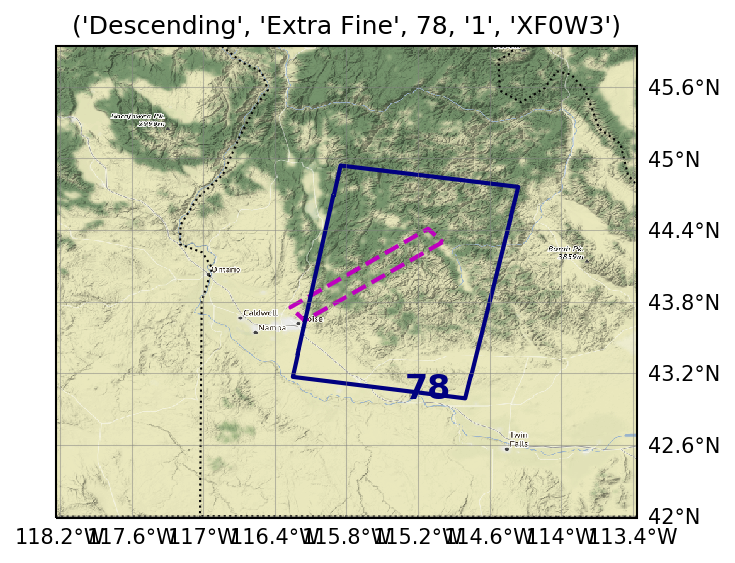

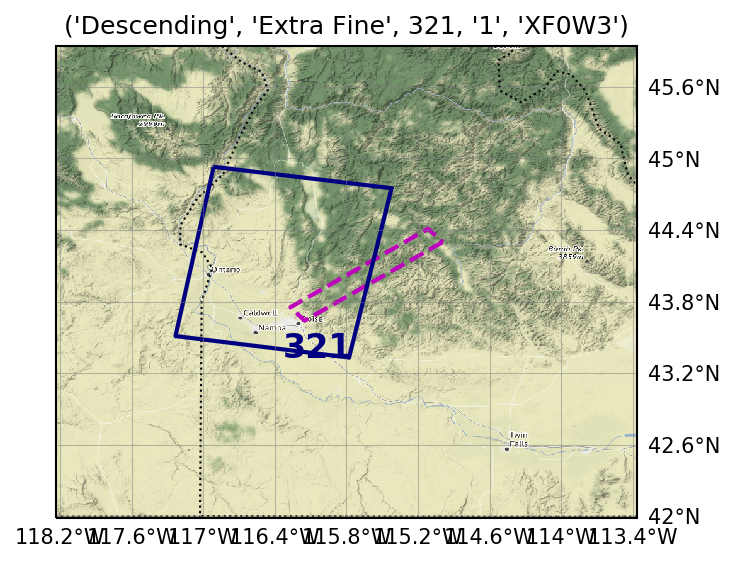

In [53]:
# Print maps for all combinations of possible interferometric pairs!
for labels, indices in GB.groups.items():
    #print(labels, indices)
    #print(labels, DF.loc[indices, "Scene ID"].tolist())
    inventory = GF.loc[indices]
    #tmp = print_dates(inventory)
    tmp = None
    plot_map(inventory, snwe, vectorFile, title=str(labels), tableFrame=tmp)
    print_inventory(inventory)

In [54]:
# Print maps for all combinations of possible interferometric pairs!
for labels, indices in GB.groups.items():
    print(labels)
    inventory = GF.loc[indices]
    tmp = print_inventory(inventory)
    print(tmp)

('Descending', 'Extra Fine', 78, '1', 'XF0W3')
  sceneId        date   dt
0  667735  2018-09-21    0
1  650777  2018-07-11  -72
2  628533  2018-04-06  -96
3  618772  2018-02-17  -48
4  613662  2018-01-24  -24
5  584318  2017-09-02 -144
6  567938  2017-06-22  -72
7  525337  2016-12-12 -192
8  514438  2016-10-25  -48
9  503777  2016-09-07  -48
('Descending', 'Extra Fine', 321, '1', 'XF0W3')
  sceneId        date   dt
0  671783  2018-10-08    0
1  660201  2018-08-21  -48
2  632470  2018-04-23 -120
3  518470  2016-11-11 -528
4  507610  2016-09-24  -48
